In [1]:
!pip install plotly pyodbc pandas matplotlib seaborn

In [17]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [96]:
import pyodbc
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# SQL Server connection details
server = 'DESKTOP-PHE7T8U' 
database = 'AdventureWorksLT2022'
username = '' 
password = ''

# Create a SQLAlchemy Engine
engine = create_engine(f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server")


In [67]:
query = """
SELECT TABLE_SCHEMA, TABLE_NAME 
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE';
"""
df_tables = pd.read_sql(query, engine)
df_tables

,TABLE_SCHEMA,TABLE_NAME
0,dbo,ErrorLog
1,dbo,BuildVersion
2,SalesLT,Address
3,SalesLT,Customer
4,SalesLT,CustomerAddress
5,SalesLT,Product
6,SalesLT,ProductCategory
7,SalesLT,ProductDescription
8,SalesLT,ProductModel
9,SalesLT,ProductModelProductDescription


In [68]:
products = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'Product';"
products = pd.read_sql(products, engine)
products

,COLUMN_NAME,DATA_TYPE
0,ProductID,int
1,Name,nvarchar
2,ProductNumber,nvarchar
3,Color,nvarchar
4,StandardCost,money
5,ListPrice,money
6,Size,nvarchar
7,Weight,decimal
8,ProductCategoryID,int
9,ProductModelID,int


In [69]:
address = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'Address';"
address = pd.read_sql(address, engine)
address

,COLUMN_NAME,DATA_TYPE
0,AddressID,int
1,AddressLine1,nvarchar
2,AddressLine2,nvarchar
3,City,nvarchar
4,StateProvince,nvarchar
5,CountryRegion,nvarchar
6,PostalCode,nvarchar
7,rowguid,uniqueidentifier
8,ModifiedDate,datetime


In [70]:
customer = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'Customer';"
customer = pd.read_sql(customer, engine)
customer

,COLUMN_NAME,DATA_TYPE
0,CustomerID,int
1,NameStyle,bit
2,Title,nvarchar
3,FirstName,nvarchar
4,MiddleName,nvarchar
5,LastName,nvarchar
6,Suffix,nvarchar
7,CompanyName,nvarchar
8,SalesPerson,nvarchar
9,EmailAddress,nvarchar


In [33]:
customeradd = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'CustomerAddress';"
customeradd = pd.read_sql(customeradd, engine)
customeradd


,COLUMN_NAME,DATA_TYPE
0,CustomerID,int
1,AddressID,int
2,AddressType,nvarchar
3,rowguid,uniqueidentifier
4,ModifiedDate,datetime


In [71]:
prod_cat = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'ProductCategory';"
prod_cat = pd.read_sql(prod_cat, engine)
prod_cat

,COLUMN_NAME,DATA_TYPE
0,ProductCategoryID,int
1,ParentProductCategoryID,int
2,Name,nvarchar
3,rowguid,uniqueidentifier
4,ModifiedDate,datetime


In [73]:

sod = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'SalesOrderDetail';"
sod = pd.read_sql(sod, engine)
sod

,COLUMN_NAME,DATA_TYPE
0,SalesOrderID,int
1,SalesOrderDetailID,int
2,OrderQty,smallint
3,ProductID,int
4,UnitPrice,money
5,UnitPriceDiscount,money
6,LineTotal,numeric
7,rowguid,uniqueidentifier
8,ModifiedDate,datetime


In [75]:

soh = "SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'SalesOrderHeader';"
soh = pd.read_sql(soh, engine)
soh

,COLUMN_NAME,DATA_TYPE
0,SalesOrderID,int
1,RevisionNumber,tinyint
2,OrderDate,datetime
3,DueDate,datetime
4,ShipDate,datetime
5,Status,tinyint
6,OnlineOrderFlag,bit
7,SalesOrderNumber,nvarchar
8,PurchaseOrderNumber,nvarchar
9,AccountNumber,nvarchar


In [39]:
df_tables.isnull().sum()

TABLE_SCHEMA    0
TABLE_NAME      0
dtype: int64

In [42]:
df_tables.duplicated().isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [43]:
df_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TABLE_SCHEMA  12 non-null     object
 1   TABLE_NAME    12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [54]:
df_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TABLE_SCHEMA  12 non-null     object
 1   TABLE_NAME    12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [47]:
df_tables.describe()

,TABLE_SCHEMA,TABLE_NAME
count,12,12
unique,2,12
top,SalesLT,ErrorLog
freq,10,1


In [51]:
unique_tables = df_tables.drop_duplicates(subset=['TABLE_SCHEMA', 'TABLE_NAME'])

print(unique_tables)

   TABLE_SCHEMA                      TABLE_NAME
0           dbo                        ErrorLog
1           dbo                    BuildVersion
2       SalesLT                         Address
3       SalesLT                        Customer
4       SalesLT                 CustomerAddress
5       SalesLT                         Product
6       SalesLT                 ProductCategory
7       SalesLT              ProductDescription
8       SalesLT                    ProductModel
9       SalesLT  ProductModelProductDescription
10      SalesLT                SalesOrderDetail
11      SalesLT                SalesOrderHeader


In [80]:
query = """
SELECT * FROM SalesLT.Customer;
"""
df_customer = pd.read_sql(query, engine)

df_customer.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
0,1,False,Mr.,Orlando,N.,Gee,None,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01
1,2,False,Mr.,Keith,None,Harris,None,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01
2,3,False,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01
3,4,False,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01
4,5,False,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01


In [82]:
query = """
SELECT * FROM SalesLT.Product;
"""
df_product = pd.read_sql(query, engine)

df_product.head()

,ProductID,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ThumbNailPhoto,ThumbnailPhotoFileName,rowguid,ModifiedDate
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,2002-06-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,43DD68D6-14A4-461F-9069-55309D90EA7E,2008-03-11 10:01:36.827
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,2002-06-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,9540FF17-2712-4C90-A3D1-8CE5568B2462,2008-03-11 10:01:36.827
2,707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,None,NaN,35,33,2005-07-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712,2008-03-11 10:01:36.827
3,708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,None,NaN,35,33,2005-07-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,A25A44FB-C2DE-4268-958F-110B8D7621E2,2008-03-11 10:01:36.827
4,709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,NaN,27,18,2005-07-01,2006-06-30,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,18F95F47-1540-4E02-8F1F-CC1BCB6828D0,2008-03-11 10:01:36.827


In [83]:
query = """
SELECT * FROM SalesLT.SalesOrderDetail;
"""
df_sod = pd.read_sql(query, engine)

df_sod.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,71774,110562,1,836,356.898,0.0,356.898,E3A1994C-7A68-4CE8-96A3-77FDD3BBD730,2008-06-01
1,71774,110563,1,822,356.898,0.0,356.898,5C77F557-FDB6-43BA-90B9-9A7AEC55CA32,2008-06-01
2,71776,110567,1,907,63.900,0.0,63.900,6DBFE398-D15D-425E-AA58-88178FE360E5,2008-06-01
3,71780,110616,4,905,218.454,0.0,873.816,377246C9-4483-48ED-A5B9-E56F005364E0,2008-06-01
4,71780,110617,2,983,461.694,0.0,923.388,43A54BCD-536D-4A1B-8E69-24D083507A14,2008-06-01


In [84]:
query = """
SELECT * FROM SalesLT.SalesOrderHeader;
"""
df_soh = pd.read_sql(query, engine)

df_soh.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,BillToAddressID,ShipMethod,CreditCardApprovalCode,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,71774,2,2008-06-01,2008-06-13,2008-06-08,5,False,SO71774,PO348186287,10-4020-000609,...,1092,CARGO TRANSPORT 5,None,880.3484,70.4279,22.0087,972.7850,None,89E42CDC-8506-48A2-B89B-EB3E64E3554E,2008-06-08
1,71776,2,2008-06-01,2008-06-13,2008-06-08,5,False,SO71776,PO19952192051,10-4020-000106,...,640,CARGO TRANSPORT 5,None,78.8100,6.3048,1.9703,87.0851,None,8A3448C5-E677-4158-A29B-DD33069BE0B0,2008-06-08
2,71780,2,2008-06-01,2008-06-13,2008-06-08,5,False,SO71780,PO19604173239,10-4020-000340,...,653,CARGO TRANSPORT 5,None,38418.6895,3073.4952,960.4672,42452.6519,None,A47665D2-7AC9-4CF3-8A8B-2A3883554284,2008-06-08
3,71782,2,2008-06-01,2008-06-13,2008-06-08,5,False,SO71782,PO19372114749,10-4020-000582,...,1086,CARGO TRANSPORT 5,None,39785.3304,3182.8264,994.6333,43962.7901,None,F1BE45A5-5C57-4A50-93C6-5F8BE44CB7CB,2008-06-08
4,71783,2,2008-06-01,2008-06-13,2008-06-08,5,False,SO71783,PO19343113609,10-4020-000024,...,992,CARGO TRANSPORT 5,None,83858.4261,6708.6741,2096.4607,92663.5609,None,7DB2329E-6446-42A8-8915-9C8370B68ED8,2008-06-08


In [66]:
df_customer.columns

Index(['COLUMN_NAME', 'DATA_TYPE'], dtype='object')

In [94]:
query = """
SELECT * FROM SalesLT.Product;
"""
sql_df = pd.read_sql(query, engine)
sql_df.head(5)

,ProductID,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ThumbNailPhoto,ThumbnailPhotoFileName,rowguid,ModifiedDate
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,2002-06-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,43DD68D6-14A4-461F-9069-55309D90EA7E,2008-03-11 10:01:36.827
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,2002-06-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,9540FF17-2712-4C90-A3D1-8CE5568B2462,2008-03-11 10:01:36.827
2,707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,None,NaN,35,33,2005-07-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712,2008-03-11 10:01:36.827
3,708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,None,NaN,35,33,2005-07-01,NaT,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,A25A44FB-C2DE-4268-958F-110B8D7621E2,2008-03-11 10:01:36.827
4,709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,NaN,27,18,2005-07-01,2006-06-30,None,b'GIF89aP\x001\x00\xf7\x00\x00\x00\x00\x00\x80...,no_image_available_small.gif,18F95F47-1540-4E02-8F1F-CC1BCB6828D0,2008-03-11 10:01:36.827


In [85]:
customer_spending = "SalesLT.HighestCustomerSpending;"
df_highest_spending = pd.read_sql(customer_spending, engine)
df_highest_spending

,FirstName,CustomerID,TotalSpent
0,Terry,29736,119960.8240
1,Krishna,30050,108597.9536
2,Christopher,29546,98138.2131
3,Kevin,29957,92663.5609
4,Jon,29796,86222.8072
5,Jeffrey,29929,81834.9826
6,Rebecca,29932,70698.9922
7,Anthony,29660,63686.2708
8,Frank,29938,45992.3665
9,Catherine,29485,43962.7901


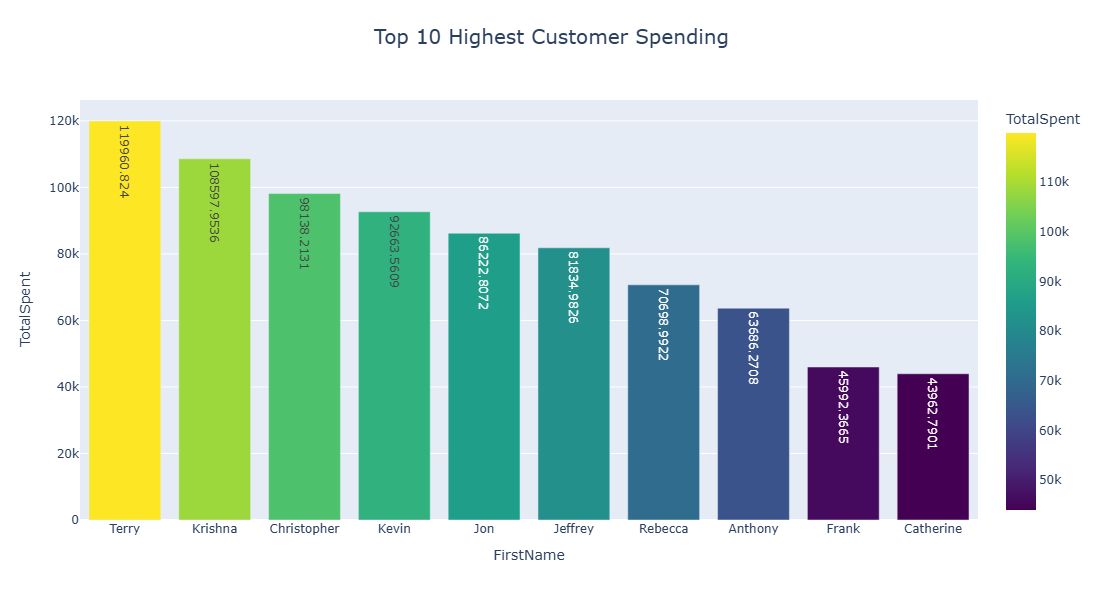

In [120]:
fig = px.bar(df_highest_spending,
             x="FirstName",
             y="TotalSpent",
             title="Top 10 Highest Customer Spending",
             color="TotalSpent",
             text="TotalSpent",
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    height=600,
    title_x=0.5,  # Center the title horizontally
    title_y=0.95, # Adjust vertical position if necessary
    title_font=dict(size=20)  # Adjust title font size if needed
)

fig.show()

In [125]:
sales_summary_cat = "SalesLT.SalesSummaryByCategory;"
df_sales = pd.read_sql(sales_summary_cat, engine)
df_sales.head(10)

,ProductCategory,TotalSales
0,Touring Bikes,220655.375796
1,Road Bikes,183130.296808
2,Mountain Bikes,170825.886000
3,Mountain Frames,54949.602000
4,Road Frames,24346.584000
5,Touring Frames,19066.260000
6,Jerseys,7017.880276
7,Vests,4309.903750
8,Cranksets,3968.868000
9,Shorts,3299.804532


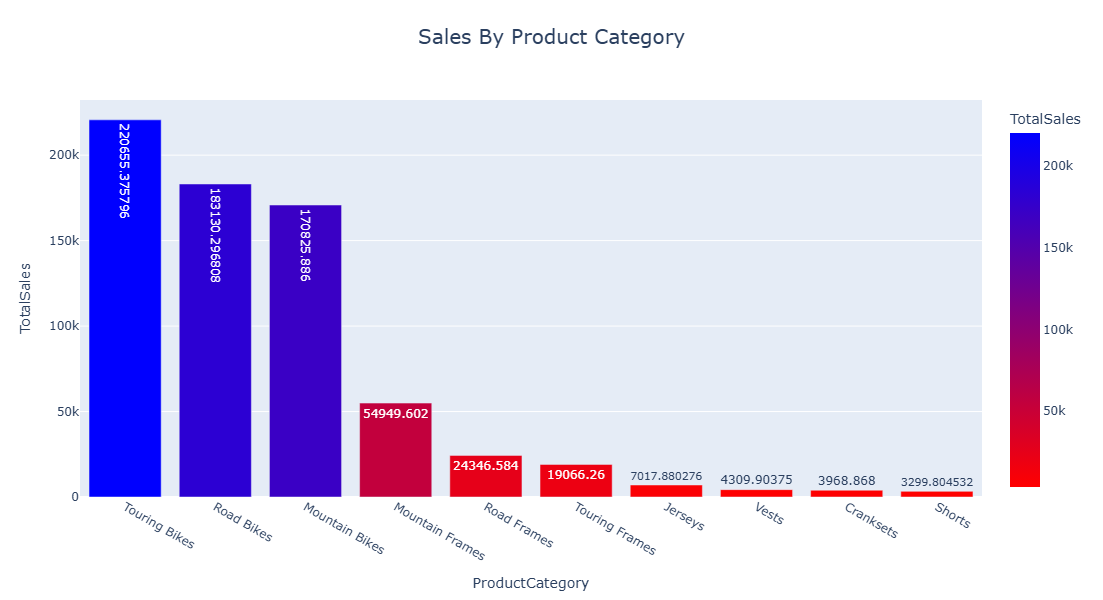

In [128]:
fig = px.bar(df_sales,
             x="ProductCategory",
             y="TotalSales",
             title="Sales By Product Category",
             color="TotalSales",
             text="TotalSales",
             color_continuous_scale='Bluered_r', hover_name="TotalSales")

fig.update_layout(
    height=600,
    title_x=0.5,  # Center the title horizontally
    title_y=0.95, # Adjust vertical position if necessary
    title_font=dict(size=20)  # Adjust title font size if needed
)

fig.show()

In [86]:
query = """
SELECT YEAR(OrderDate) Year, SUM(TotalDue) AS TotalRevenue
FROM
	SalesLT.SalesOrderHeader
GROUP BY 
	YEAR(OrderDate)
ORDER BY  
	Year;
"""

df_TotalRev = pd.read_sql(query, engine)
df_TotalRev

,Year,TotalRevenue
0,2008,956303.5949


In [87]:
query = """
SELECT YEAR(OrderDate) AS Year, AVG(TotalDue) AS AvgOrderValue
FROM SalesLT.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY Year;
"""

df_AvgOrderValue = pd.read_sql(query, engine)
df_AvgOrderValue

,Year,AvgOrderValue
0,2008,29884.4873


In [88]:
best_sell_product = "SalesLT.BestSellingProduct;"
df_best_selling_pro = pd.read_sql(best_sell_product, engine)
df_best_selling_pro

,ProductID,ProductName,TotalSales
0,976,"Road-350-W Yellow, 48",38612.4730
1,969,"Touring-1000 Blue, 60",37191.4920
2,783,"Mountain-200 Black, 42",37178.8380
3,782,"Mountain-200 Black, 38",35801.8440
4,957,"Touring-1000 Yellow, 60",23745.3372
5,967,"Touring-1000 Blue, 50",22887.0720
6,780,"Mountain-200 Silver, 42",20879.9100
7,973,"Road-350-W Yellow, 40",20411.8800
8,784,"Mountain-200 Black, 46",19277.9160
9,974,"Road-350-W Yellow, 42",18949.0286


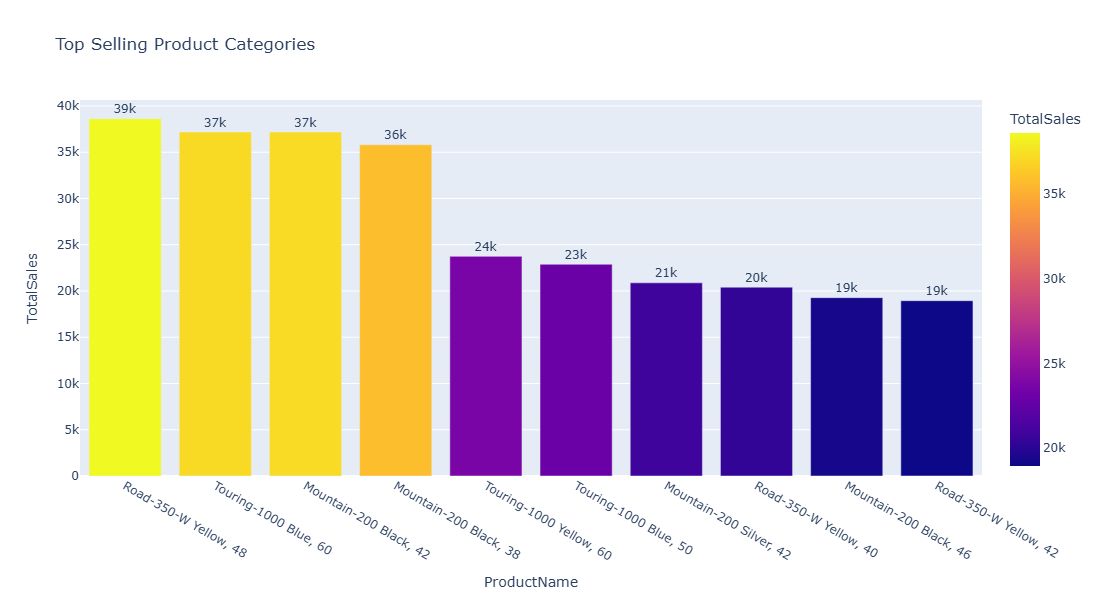

In [101]:
fig = px.bar(df_best_selling_pro, 
             x="ProductName", 
             y="TotalSales", 
             title="Top Selling Product Categories",
             color="TotalSales",
             text="TotalSales")

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(height=600)
fig.show()


In [91]:
best_freq_per_pro = "SalesLT.FrequentlyPurchasedProducts;"
df_best_freq_per_pro = pd.read_sql(best_freq_per_pro, engine)
df_best_freq_per_pro

,ProductID,Product,OrderCount
0,864,"Classic Vest, S",10
1,715,"Long-Sleeve Logo Jersey, L",10
2,712,AWC Logo Cap,9
3,884,"Short-Sleeve Classic Jersey, XL",9
4,876,Hitch Rack - 4-Bike,8
5,883,"Short-Sleeve Classic Jersey, L",8
6,877,Bike Wash - Dissolver,7
7,948,Front Brakes,7
8,880,Hydration Pack - 70 oz.,7
9,938,LL Road Pedal,7


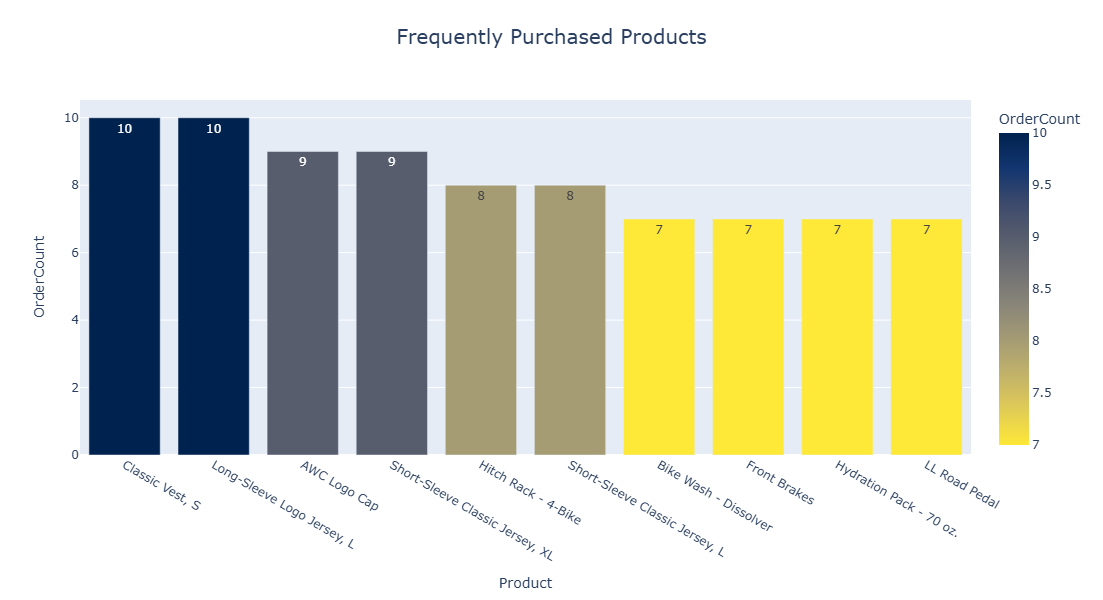

In [130]:
fig = px.bar(df_best_freq_per_pro,
             x="Product",
             y="OrderCount",
             title="Frequently Purchased Products",
             color="OrderCount",
             text="OrderCount",
             color_continuous_scale=px.colors.sequential.Cividis_r)

fig.update_layout(
    height=600,
    title_x=0.5,  # Center the title horizontally
    title_y=0.95, # Adjust vertical position if necessary
    title_font=dict(size=20)  # Adjust title font size if needed
)

fig.show()

In [131]:
shppingdest = "SalesLT.ShoppingDestination;"
df_shppingdest = pd.read_sql(shppingdest, engine)
df_shppingdest

,City,StateProvince,NumberOfCustomers
0,Toronto,Ontario,23
1,London,England,13
2,Montreal,Quebec,12
3,Calgary,Alberta,11
4,Richmond,British Columbia,6
5,Mississauga,Ontario,6
6,Burnaby,British Columbia,5
7,Chicago,Illinois,5
8,Ottawa,Ontario,5
9,Dallas,Texas,5


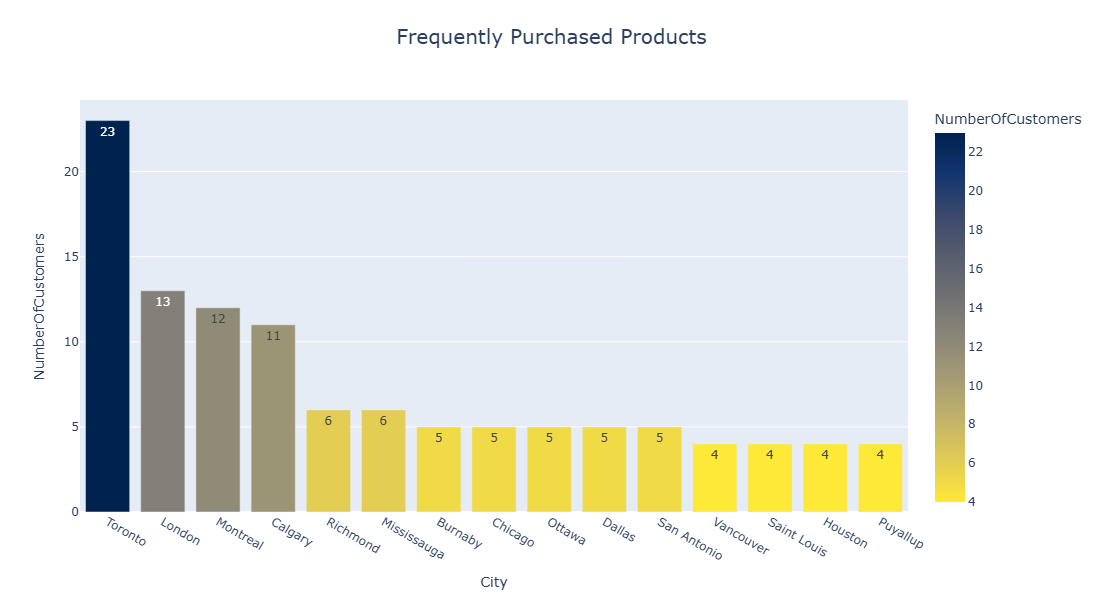

In [151]:
fig = px.bar(df_shppingdest,
             x="City",
             y="NumberOfCustomers",
             title="Frequently Purchased Products",
             color="NumberOfCustomers",
             text="NumberOfCustomers",
             color_continuous_scale=px.colors.sequential.Cividis_r)

fig.update_layout(
    height=600,
    title_x=0.5,  # Center the title horizontally
    title_y=0.95, # Adjust vertical position if necessary
    title_font=dict(size=20)  # Adjust title font size if needed
)

fig.show()